[[528. 528.]
 [528. 528.]]
4095


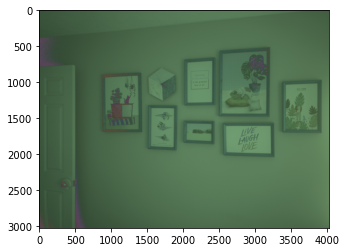

In [21]:
!pip install rawpy

import rawpy
import copy as cp
from PIL import Image
import imageio
import numpy as np
import sys
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math





in_path = 'dayroom.dng'
raw = rawpy.imread(in_path)


image = np.array(raw.raw_image, dtype=np.double)
#Minimize black levels
black = np.reshape(np.array(raw.black_level_per_channel, dtype=np.double), (2, 2))
print(black)
black = np.tile(black, (image.shape[0]//2, image.shape[1]//2))
image = (image - black) / (raw.white_level - black)
print(raw.white_level)






raw_image=image

#Demosiacing the image by creating Red, blue, Green intensified images and merging them all together using cv2 in python

row = raw_image.shape[0]
col = raw_image.shape[1]

red = cp.deepcopy(raw_image)
green = cp.deepcopy(raw_image)
blue = cp.deepcopy(raw_image)

for i in range(0, row, 2):
    for j in range(0, col, 2):
        red[i + 1][j] = raw_image[i][j]
        red[i + 1][j + 1] = raw_image[i][j]
        red[i][j + 1] = raw_image[i][j]



for i in range(0, row, 2):
    for j in range(0, col, 2):
        temp = raw_image[i + 1][j] / 2 + raw_image[i][j + 1] / 2
        green[i][j] = temp
        green[i + 1][j + 1] =temp
        green[i + 1][j] =temp
        green[i][j + 1] =temp


for i in range(0, row, 2):
    for j in range(0, col, 2):
        blue[i + 1][j] = raw_image[i + 1][j + 1]
        blue[i][j] = raw_image[i + 1][j + 1]
        blue[i][j + 1] = raw_image[i + 1][j + 1]

rgb_image = cv2.merge([blue, green, red])
#plt.imshow(rgb_image)


#srgb gamma curve correction(value on wikepedia 0.313..)
i = rgb_image < 0.0313
j = np.logical_not(i)
#I am using 12.92 as it is the standard values according to wiwkipedia
rgb_image[i] = 12.92 * rgb_image[i]

rgb_image[j] = 211 / 200 * rgb_image[j] ** (5 / 12) - 11 / 200




plt.imshow(rgb_image)
plt.savefig('saved_figure.png')
